In [26]:
import sys
sys.path.append('../cloud_classifier')

import cloud_trainer
import data_handler
import importlib
importlib.reload(cloud_trainer)
importlib.reload(data_handler)

ct = cloud_trainer.cloud_trainer()
dh = data_handler.data_handler()

#### Read all sets from folder

In [27]:
import os
import re
import numpy as np

#TODO: os.path.join().
dh.training_sets = None
folder = "../data/cloud-typing-data/"
n_max = 2

sat_pattern = "msevi-medi-(.{13})\.nc"
label_pattern = "nwcsaf_msevi-medi-(.{13})\.nc"

sat_comp = re.compile(sat_pattern)
label_comp = re.compile(label_pattern)
data_sets, sat_files, lab_files = list(), {}, {}

files = os.listdir(folder)
for file in files:
    sat_id = sat_comp.match(file)
    lab_id = label_comp.match(file)
    
    if (sat_id):
        sat_files[sat_id.group(1)] = folder  + file  
    elif (lab_id):
        lab_files[lab_id.group(1)] = folder  + file

for key in sat_files.keys():
    if(key in lab_files):
        data_sets.append([sat_files[key], lab_files[key]])
        
n = 0
for ds in data_sets:
    dh.add_training_files(ds[0], ds[1])
    n += 1
    if(n >= n_max):
        break

#### Get mask indices from provided nc-file

In [28]:
import xarray as xr
mask_file = "../data/cloud-typing-data/lsm_mask_medi.nc" 
mask = xr.open_dataset(mask_file)
masked_indices = np.where(mask["land_sea_mask"])

In [29]:
trv_name = "../training_vectors_new"
filename_cl = "../classifer_1"
filename_labels = "../predicted_labels_1.nc"

dh.set_parameters(verbose = True)
dh.set_parameters(samples = 100, hours = [0], difference_vectors = True, original_values = True)
dh.set_parameters(nwcsaf_in_version = "auto", nwcsaf_out_version = "v2018")
dh.set_parameters(input_channels = ['bt062', 'bt073', 'bt087', 'bt097', 'bt108', 'bt120', 'bt134'], cloudtype_channel = "ct")

In [32]:
#v,l  = dh.create_training_set(masked_indices = masked_indices)


In [33]:
#dh.save_training_set(v, l, trv_name)
v,l = dh.load_training_set(trv_name)

In [36]:
ct.set_parameters(classifer_type = "Forest", feature_preselection = False, max_depth = 20)
ct.evaluate_parameters(v,l)


Correctly identified 13640 out of 16673 labels! 
Positve rate is: 0.818089


0.8180891261320699

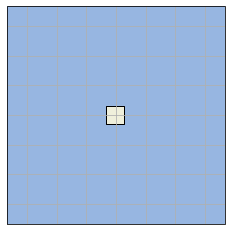

In [37]:
import xarray as xr
real_labels = xr.open_dataset(dh.training_sets[0][1])
dh.plot_labels(labels = real_labels, hour = 0)

In [253]:
data = xr.open_dataset(dh.training_sets[0][1])
print(data.keys())

KeysView(<xarray.Dataset>
Dimensions:    (bndsize: 2, time: 1, x: 1300, y: 500)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-24T22:00:00
  * x          (x) uint16 1562 1563 1564 1565 1566 ... 2857 2858 2859 2860 2861
  * y          (y) uint16 362 363 364 365 366 367 ... 856 857 858 859 860 861
Dimensions without coordinates: bndsize
Data variables:
    time_bnds  (time, bndsize) datetime64[ns] ...
    ct         (time, y, x) float32 ...
    cph        (time, y, x) float32 ...
    platform   (time) float32 ...
    lon0       (time) float64 ...
Attributes:
    filename:                     CTYin20191224220041005SVMSG01MD.nc
    title:                        ICDR SEVIRI Clouds
    summary:                      This file contains Cloud Type derived from ...
    comment:                      Data in this file are stored in SEVIRI imag...
    product_version:              4.10
    creator_name:                 DE/DWD
    creator_email:                contact.cmsaf@dwd.de
    cre

In [259]:
labels_1 = "../data/nwcsaf_msevi-nawdex-20160920.nc"
ldat = xr.open_dataset(labels_1)
print(ldat.keys())

KeysView(<xarray.Dataset>
Dimensions:        (cols: 2776, ndim: 2, rows: 1004, time: 24)
Coordinates:
    lat            (rows, cols) float32 ...
    lon            (rows, cols) float32 ...
  * time           (time) float64 2.016e+07 2.016e+07 ... 2.016e+07 2.016e+07
Dimensions without coordinates: cols, ndim, rows
Data variables:
    msevi_region   (ndim, ndim) int64 ...
    nwcsaf_region  (ndim, ndim) int64 ...
    CTTH_HEIGHT    (time, rows, cols) float32 ...
    CMa            (time, rows, cols) float32 ...
    CT             (time, rows, cols) float32 ...
Attributes:
    description:  Based on synthetic Meteosat-SEVIRI images from the Prime Se...
    title:        NWCSAF cloud products
    institution:  Leibniz Institute for Tropospheric Research
    author:       Fabian Senf (senf@tropos.de))
